In [32]:
import geopandas as gpd
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
endpoint = "https://1v7t29ppce.execute-api.us-west-2.amazonaws.com/dev/danger"

In [29]:
regions_raw = requests.get(endpoint)

In [30]:
joined = gpd.GeoDataFrame.from_features(regions_raw.json()['features'])
joined.crs = {'init':'epsg:4326'}

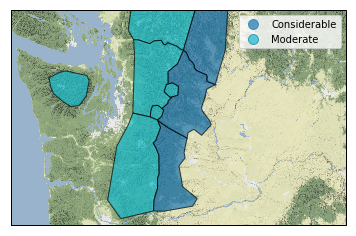

In [33]:
import cartopy.io.img_tiles as cimgt
tiler = cimgt.StamenTerrain()
proj=tiler.crs
ax = plt.axes(projection=proj)
#ax.gridlines()

# ax.add_feature(feature.NaturalEarthFeature(
#         category='cultural',
#         name='admin_1_states_provinces_lines',
#         scale='50m',
#         facecolor='none'))
# ax.coastlines(resolution='10m')
#ax.add_feature(feature.BORDERS)
ax.set_extent([-124.849,-116.9156,49.0024,45.5435])
ax.add_image(tiler,9)
joined.to_crs(proj.proj4_init).plot(column='danger_elev_high', legend=True, ax=ax, alpha=0.7, edgecolor='black')

In [ ]:
time 